# Application example of vibration features 
---
Machine monitoring involves the development of scalar and frequency indicators that provide in real time information on machine state's (on, off, anomaly, regular running), hence the creation of this new package called `Vibration Features`.

To better understand the use of `Vibration Features`, we propose in this notebook an application example on basic signals. We will compute here some scalar indicators namely global acceleration and speed levels, Peak to peak displacement over [10Hz - 1kHz], Acceleartion Crest and K factor over [1kHz - 10kHz].


## Configuration

In [1]:
%matplotlib notebook
# %cd -q ../
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from wavely.signal.features.features import FeaturesComputer
from wavely.signal.features.vibrationfeatures import gl_filter
from wavely.signal.units.helpers import split_signal

## Velocity & displacement
---
Let's start with velocity and displacement computation of a ramp function defined as:

<IPython.core.display.Javascript object>


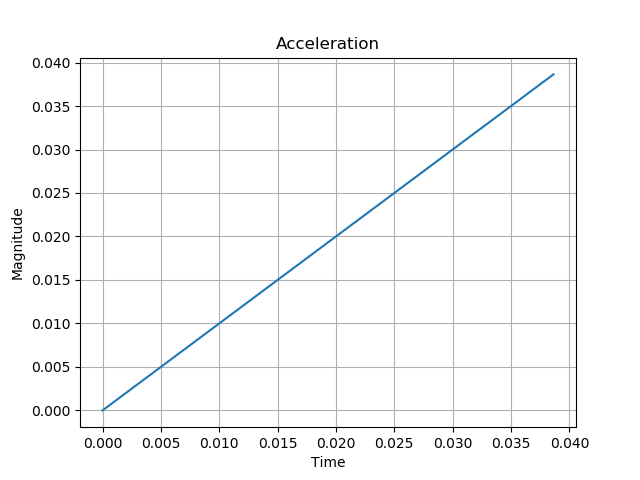

In [2]:
rate = 6600
n = 256
x = np.arange(0, n) / rate
t = np.arange(0, n) / rate
y = split_signal(x, rate, n / rate)
plt.figure()
plt.plot(t, y.T)
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.title("Acceleration")
plt.grid()

In [3]:
fc = FeaturesComputer(block_size=n, rate=rate, features=["velocity", "displacement"])

IndexError: index 0 is out of bounds for axis 0 with size 0

To get the list of every feature that can be use as an input, you can use `af.allfeatures()`.

In [4]:
fc.compute(y)
fc.allfeatures()

dict_keys(['periodogram', 'spectrum', 'logmelspectrogram', 'binfactor', 'spectralcentroid', 'spectralspread', 'spectralskewness', 'spectralkurtosis', 'spectralpower', 'spectralflatness', 'spectralcrest', 'normspectrum', 'spectralentropy', 'spectralflux', 'peakfreq', 'highfrequencycontent', 'spectralirregularity', 'spectralrolloff', 'hilbert_transform', 'amplitude_envelope', 'instantaneous_phase', 'instantaneous_frequency', 'enbw', 'spl', 'ultrasoundlevel', 'audiblelevel', 'band_periodogram', 'bandleq', 'bandflatness', 'bandcrest', 'power', 'rms', 'crest', 'peak_to_peak', 'crest_factor', 'temporal_kurtosis', 'zero_crossing_rate', 'gl_filter', 'velocity', 'displacement', 'gl_acceleration', 'gl_velocity', 'peak_to_peak_displacement', 'crest_factor_acceleration', 'k_factor_acceleration'])

Let's compare the computed features to real primitive functions: 

In [5]:
v = x[0] + 0.5 * x ** 2  # primitive function of the acceleration

In [6]:
d = v[0] + x[0] * x + (1 / 6) * x ** 3  # primitive function of the velocity

<IPython.core.display.Javascript object>


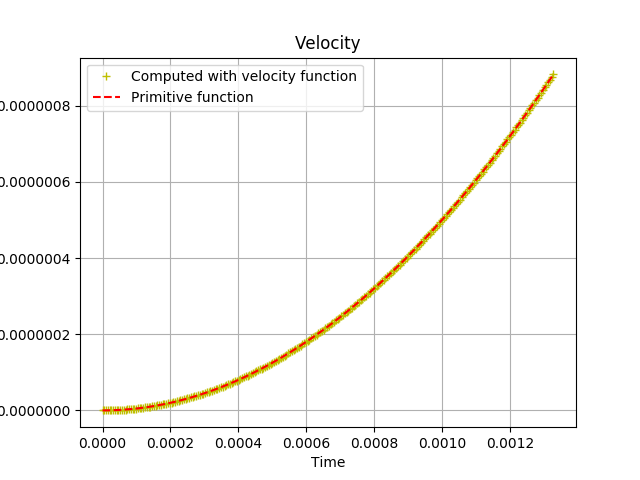

In [7]:
plt.figure()
plt.plot(t, fc["velocity"][0], "+y", label="Computed with velocity function")
plt.plot(t, v, "r--", label="Primitive function")
plt.legend(loc="upper left")
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.title("Velocity")
plt.grid()

<IPython.core.display.Javascript object>


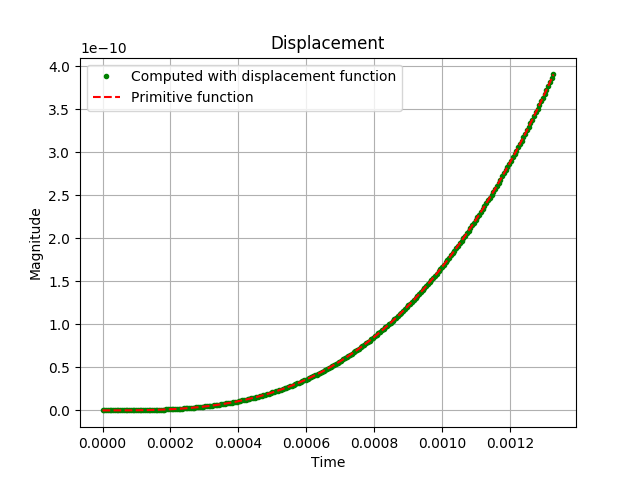

In [8]:
plt.figure()
plt.plot(t, fc["displacement"][0], ".g", label="Computed with displacement function")
plt.plot(t, d, "r--", label="Primitive function")
plt.legend(loc="upper left")
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.title("Displacement")
plt.grid()

In [9]:
print("The RMSE for velocity equals", np.sqrt(((fc["velocity"][0] - v) ** 2).mean()))
print(
    "The RMSE for displacement equals",
    np.sqrt(((fc["displacement"][0] - d) ** 2).mean()),
)

The RMSE for velocity equals 6.991969952851107e-23
The RMSE for displacement equals 1.7350819143257563e-15


## Filtering
---
Let's check `gl_filter` function. We define here a sum of two sin signals with diffrent frequenices `f1` and `f2`.

In [10]:
rate = 48000
n = 1000
order = 5
f1 = 100
f2 = 2e3
Wn = np.array([1e3, 10e3])
t = np.arange(0, n) / rate
# sum of 2 sin signals
s = 1 * np.sin(2.0 * np.pi * f1 * t) + 2 * np.sin(2.0 * np.pi * f2 * t)

<IPython.core.display.Javascript object>


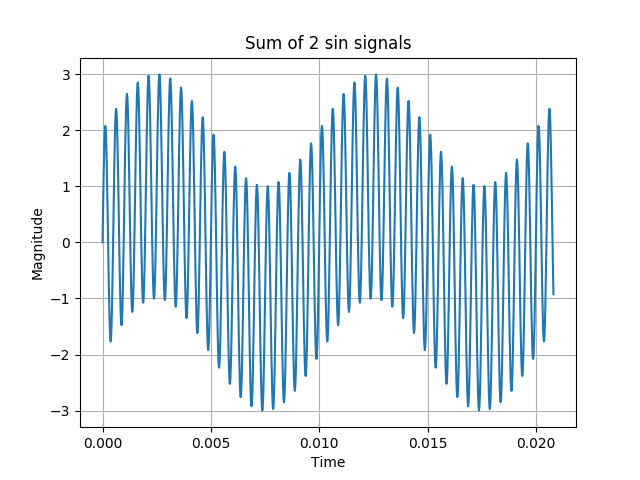

In [11]:
plt.figure(4)
plt.plot(t, s)
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.title("Sum of 2 sin signals")
plt.grid()

In [12]:
sf = gl_filter(blocks=s, rate=rate, Wn=Wn, order=order)

<IPython.core.display.Javascript object>


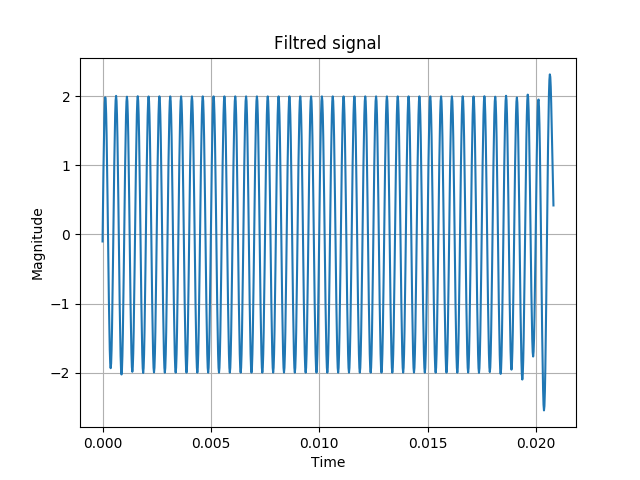

In [13]:
plt.figure()
plt.plot(t, sf)
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.title("Filtred signal")
plt.grid()

## Vibration features computation

In [14]:
blocks = split_signal(s, rate, n / rate)

In [15]:
fc = FeaturesComputer(
    block_size=n,
    rate=rate,
    features=[
        "gl_acceleration",
        "gl_velocity",
        "peak_to_peak_displacement",
        "crest_factor_acceleration",
        "k_factor_acceleration",
    ],
)
feats = fc.compute(blocks)
pd.DataFrame.from_dict(feats)

,crest_factor_acceleration,k_factor_acceleration,peak_to_peak_displacement,gl_acceleration,gl_velocity
0,1.792863,3.619814,1.403451e+06,1.42092,2.767212e+08
